# 2. Thermodynamics (i)

The gas we were thinking about in the previous lecture must satisfy conservation laws: Conservation of mass $m_a$, momentum $m_a[u, v, w]^T=m_a\mathbf{u}$ and energy $E$[^fnfd], which give us extremely powerful tools to predict the evolution of the atmospheric gas. Therefore, a lot of atmospheric science boils down to studying flows of mass, momentum and energy through the atmosphere. Here, we will look mostly at energy flows, since these turn out to be perhaps the most intuitive way to understand fundamental meteorology.

```{note} Questions you should be able to answer at the end of this module:
   - Why does the atmosphere's temperature and pressure drop off with height the way they do?
   - Why do we rather use enthalpy, rather than internal energy, for our calculations?
   - What are dry and moist static energy, and why are they useful?
   - Can I read a thermodynamic (skew T-log p) diagram?
```
[^fnfd]: You can choose to derive and study those in depth in the course on [geophysical fluid mechanics](https://studyhandbook.wur.nl/modules/HWM23806?type=Cursory)

Idea for lecture:
- Present the vertical structure of T and p from a bunch of soundings
- Ask: Why does it look that way?
- Say: We have to make a detour to energetics and the vertical force balance to really understand this (in the global average, there is no horizontal transport)
- Start with the vertical force balance. That will answer what happens to pressure with height, but it doesn't really answer the question we were after, because it depends on what happens with temperature with height.
So then, let's look at energetics:
- Rewrite hydrostatic law: dp/dz=-rhog => d(gz) = -dp/rho. I.e. this is now an energy statement - the energy required give the a parcel potential energy is -dp/rho. But what the heck is that? How can we relate it to the energy in the parcel? And in particular, I promised the vertical structure of temperature. It seems logical that the parcel will have to cool in a way to gain potential energy - but how exactly?
- Present the energies in the parcel, and what sources might change it. Note that gz doesn't appear, because the air doesn't care about where it is, it just knows about T, p and rho. So you get, pretty generally:
- $c_v dT + d u^2/2 + l_v dq - L_f dq_i = (Q_r + Q_a)dt - pdV/m$ where work is nicely derived from force-movement calculations in Wallace and Hobbs.
- Let's start simple: Zero moisture, zero radiation/advection (adiabatic).
- $c_vdT = -pdV/m$. So expanding the parcel leads to cooling. Makes sense (it really doesn't because this doesn't come from the gas law. Look into that.). But we had something in terms of changes in pressure, not changes in volume? Rewrite with product rule: $d(pV) = Vdp + pdV$, or $pdV = d(pV) - Vdp$. And with dry gas law ($pV=mR_dT$), $d(pV) = mR_ddT$, so $pdV/m = R_ddT - \frac{1}{\rho}dp$, i.e. because of the gas law, work (changes in volume) itself can be thought of as a combination of increasing the temperature, and reducing the pressure.
- Then we see that $c_v dT = -R_d dT - \frac{1}{\rho}dp$, i.e. $dp/\rho = (R+c_v)dT$ (or a number of other energy sources if we counted them). Defines the cooling we need to raise the parcel! Called enthalpy (heat at constant pressure). It measures the heat lost by equilibrating to the new lower pressure.
- And it defines the simplest model we can make for the vertical temperature structure: $dT/dz = g/c_p=-10/1000=-0.01$ K/m or 10 K/km. Compare, and find it is way too much, except in the boundary layer. There, $c_pT + gz$, sometimes expressed as "the dry static energy", is conserved. We will figure out why in the BL lecture.

Next, derive potential temperature and make a thermodynamic diagram (skew T-ln p) from this


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/var/folders/2v/kjs6dspj31v39dztjqjqb_ym0000gn/T/ipykernel_94446/1573035792.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('data/ghgt_00z-mly-202408.txt', sep='\s+', header=None).rename(columns={3: "Pressure [hPa]", 4: "hgeo"})
/var/folders/2v/kjs6dspj31v39dztjqjqb_ym0000gn/T/ipykernel_94446/1573035792.py:11: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('data/temp_00z-mly-202408.txt', sep='\s+', header=None).rename(columns={3: "Pressure [hPa]", 4: "temp"})


<Axes: xlabel='hgeo', ylabel='Geopotential height [m]'>

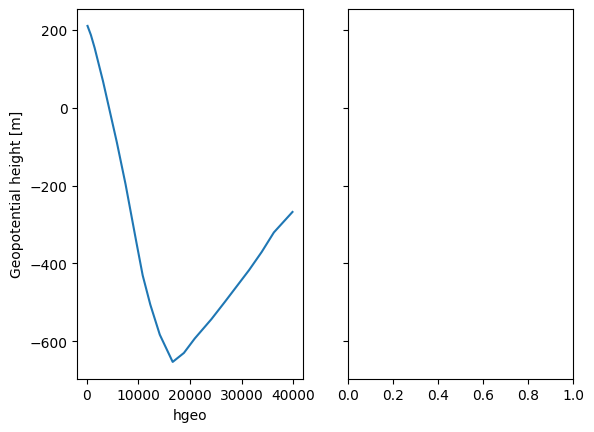

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, sharey=True)

# Pressure
df = pd.read_csv('data/ghgt_00z-mly-202408.txt', sep='\s+', header=None).rename(columns={3: "Pressure [hPa]", 4: "hgeo"})
df_pres = df[["Pressure [hPa]", "hgeo"]].groupby(["Pressure [hPa]"]).mean().loc[3:1000]

# Temperature
df = pd.read_csv('data/temp_00z-mly-202408.txt', sep='\s+', header=None).rename(columns={3: "Pressure [hPa]", 4: "temp"})
df_temp = df[["Pressure [hPa]", "temp"]].groupby(["Pressure [hPa]"]).mean().loc[3:1000]

dfpt = pd.concat([df_pres, df_temp], axis=1).set_index('hgeo')

dfpt.plot(ax=axs[0], legend=False, ylabel='Geopotential height [m]')

## Atmospheric energetics

### Energy of an atmospheric air parcel
For a volume of air $V$ with a fixed mass $m_a$, the first law of thermodynamics states that energy $E$ must be conserved. But what is this $E$? For a parcel of moist atmospheric air in motion, a useful decomposition is[^fnmass]:

$$
E/m = c_v T + gz + \frac{1}{2}u^2 + L_v q_v - L_f q_i
$$ (energy)

Where:
- $c_v T$ measures the internal energy above $T=0$ K (absolute zero). It essentially measures the kinetic energy of the random motion of the particles within the volume, which we discussed in [the previous lecture](sec:ideal-gases). To scale this energy into temperature, we need the factor $c_v$, the heat capacity of the air in the parcel at constant volume (for dry air, $c_v \approx 717$ J/kg/K)[^fncv]. It is defined "at constant volume" to separate the internal energy from the parcel doing work through expansion (i.e. through changes in volume - see point 2. below).
- $gz$ is the gravitational potential energy above $z=0$ (sea level), with $g=9.81$ m/s$^2$
- $\frac{1}{2}u^2$ is the kinetic energy above $u=0$ (air at rest), with $u=\sqrt{u^2+v^2+w^2}$ the wind speed
- $L q_v - L_i q_i$ is the "latent" (or "hidden") energy stored in the parcel's water vapour, which is "released" when it changes phase. Specifically, $L_v q_v$ is the energy increase that would result from converting all the parcel's water vapour into liquid water (its efficiency is determined by the latent heat of vaporisation $L_v\approx 2.5 \times 10^6$ J/kg condensed water), and $-L_f q_i$ the energy increase from in turn losing some of that liquid water to $q_i$ kg ice/kg air (its efficiency is the smaller latent heat of fusion $L_f \approx 3.34\times 10^5$ J/kg frozen water).

We make these strange-looking "above reference state x" statements, because when we study energy flows, we always consider *changes* in energy relative to some reference state, and we will always have to be explicit about these states. With these reference states defined, let's think about how $E/m$ as in eq. {eq}``energy`` might actually change. In the atmosphere, there are really only three things that could happen:
1. We might exchange some of the air in the parcel with more/less energetic air, i.e. we could *advect* air in and out
2. The parcel might do work through expansion
3. The parcel might heat/cool through radiation

Although 1. is crucially important in many situations, in this course, we will mostly concentrate on 2. and 3. That is because if we view our parcel as the whole atmosphere, then we cannot exchange air with it; that is, we can already understand many coarse features of the atmosphere without it. We will get into radiation in detail next week. Here, we will focus on doing work, because it will allow us to say something about the vertical structure of the atmosphere.

### Dry air, enthalpy, and the meaning of gravitational potential energy
Test

[^fnmass]: Note that we have divided mass out on both sides, so we are looking at energy per unit mass, in J/kg. This is often called "specific energy".
[^fncv]: More precisely, if the internal energy per unit mass is $u$, then to convert small changes in $u$ to small changes in $T$ we would write $du = \frac{du}{dT} dT$, identifying $c_v=\frac{du}{dT}$. It actually varies with temperature itself, but for this course we'll keep it fixed